**Hourly Activity Data:**
  - Hourly activity data offers a detailed breakdown of users' activity levels throughout the day. It provides information on the number of steps taken and exercise intensity levels during each hour. Analyzing hourly activity patterns helps identify peak activity hours and periods of low activity, which can inform recommendations for optimizing daily routines

**Objective:**

*   The objective of analyzing hourly activity data is to Identify Patterns Understand how activity levels fluctuate throughout the day.Use insights to encourage healthier habits and improve overall well-being.



1. Loading libraries for further processing.

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)

2. Loading Dataset

In [ ]:
hourly_calories = pd.read_csv('/content/hourlyCalories_merged.csv')
hourly_intensity = pd.read_csv('/content/hourlyIntensities_merged.csv')
hourly_steps  = pd.read_csv('/content/hourlySteps_merged.csv')

3. Analysing Dataset

In [ ]:
hourly_calories.head()

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


In [ ]:
hourly_intensity.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,0,0.000000


In [ ]:
hourly_intensity.dtypes

Id                    int64
ActivityHour         object
TotalIntensity        int64
AverageIntensity    float64
dtype: object

In [ ]:
hourly_steps.dtypes

Id               int64
ActivityHour    object
StepTotal        int64
dtype: object

4. Transforming Data into proper formate

In [ ]:
hourly_calories["ActivityHour"] = pd.to_datetime(hourly_calories["ActivityHour"])
hourly_intensity["ActivityHour"] = pd.to_datetime(hourly_intensity["ActivityHour"])
hourly_steps["ActivityHour"] = pd.to_datetime(hourly_steps["ActivityHour"])

5. Checking for Changes

In [ ]:
print("Hourly calories data type is ",hourly_calories["ActivityHour"].dtypes)
print("Hourly intensity data type is ",hourly_intensity["ActivityHour"].dtypes)
print("Hourly steps data type is ",hourly_steps["ActivityHour"].dtypes)

6. Checking unique users

In [ ]:
print("Hourly Calories Datataset:",hourly_calories.Id.nunique(),"unique users")
print("Hourly intensity Dataset:",hourly_intensity.Id.nunique(),"unique users")
print("Hourly Steps Dataset:",hourly_steps.Id.nunique(),"unique users")

Hourly Calories Datataset: 33 unique users
Hourly intensity Dataset: 33 unique users
Hourly Steps Dataset: 33 unique users


7. Checking shape of Dataset

In [ ]:
print("Shape of Hourly_calories:",hourly_calories.shape)
print("Shape of Hourly Intensity:",hourly_intensity.shape)
print("Shape of Hourly Steps:",hourly_steps.shape)

Shape of Hourly_calories: (22099, 3)
Shape of Hourly Intensity: (22099, 4)
Shape of Hourly Steps: (22099, 3)


8. Checking for null values

In [ ]:
print("Hourly_calories Dataset has missing values:",hourly_calories.isna().sum())
print("Hourly_intensity Dataset has missing values:",hourly_intensity.isna().sum())
print("Hourly_steps Dataset has missing values:",hourly_steps.isna().sum())

Hourly_calories Dataset has missing values: Id              0
ActivityHour    0
Calories        0
dtype: int64
Hourly_intensity Dataset has missing values: Id                  0
ActivityHour        0
TotalIntensity      0
AverageIntensity    0
dtype: int64
Hourly_steps Dataset has missing values: Id              0
ActivityHour    0
StepTotal       0
dtype: int64


9. Merging hourly Steps & Calories

In [ ]:
for col in hourly_steps.columns, hourly_calories.columns:
  print(col)

Index(['Id', 'ActivityHour', 'StepTotal'], dtype='object')
Index(['Id', 'ActivityHour', 'Calories'], dtype='object')


10. As 'Id' & 'ActivityHour' is common in both tables, we'll merge them on same col.

In [ ]:
merge_df= pd.merge(hourly_steps, hourly_calories,
                   on=['Id', "ActivityHour"], how='inner')
merge_df.head()

,Id,ActivityHour,StepTotal,Calories
0,1503960366,4/12/2016 12:00:00 AM,373,81
1,1503960366,4/12/2016 1:00:00 AM,160,61
2,1503960366,4/12/2016 2:00:00 AM,151,59
3,1503960366,4/12/2016 3:00:00 AM,0,47
4,1503960366,4/12/2016 4:00:00 AM,0,48


11. Merging merge_df & hourly intensity on same column

In [ ]:
merge_df1= pd.merge(merge_df, hourly_intensity,
                   on=['Id', "ActivityHour"], how='inner')
merge_df1.head()

,Id,ActivityHour,StepTotal,Calories,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,373,81,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,160,61,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,151,59,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,0,47,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,0,48,0,0.000000


In [ ]:
merge_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22099 entries, 0 to 22098
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   ActivityHour      22099 non-null  object 
 2   StepTotal         22099 non-null  int64  
 3   Calories          22099 non-null  int64  
 4   TotalIntensity    22099 non-null  int64  
 5   AverageIntensity  22099 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.7+ MB


12. Visualizing the cleaned dataset

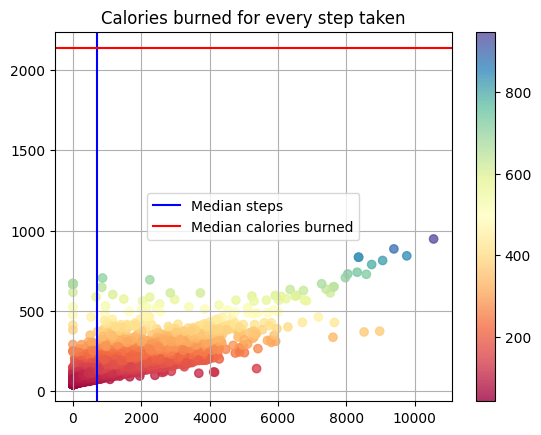

In [ ]:
#Showing amount of calones burnt for every steps taken in a scatter plot shown below.

plt.style.use("default")
plt.scatter(merge_df1["StepTotal"],merge_df1["Calories"],
            alpha = 0.8, c= merge_df1["Calories"],
            cmap = "Spectral")


# add annotations and visuals
median_calories = 2134
median_steps = 705

plt.colorbar(orientation = "vertical")
plt.axvline(median_steps, color = "Blue", label = "Median steps")
plt.axhline(median_calories, color = "red", label = "Median calories burned")

plt.xlable = ("Steps taken")
plt.ylable = ("Calories burned")

plt.title("Calories burned for every step taken")
plt.grid(True)
plt.legend()
plt.show()

Key Finding:


*   We can see that most of people are taking mid level steps and that's why burning low to medium level of calories
*   There are few people that are taking more steps for burning high calories



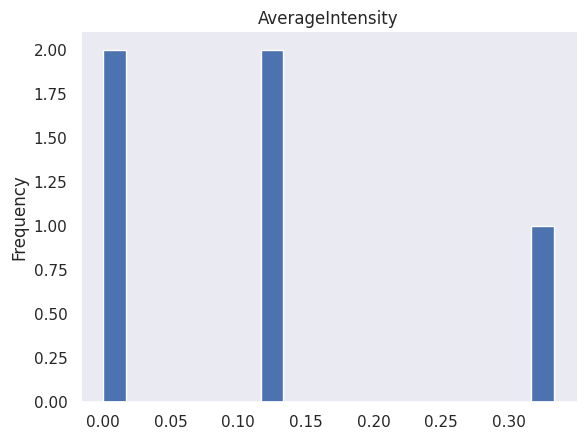

In [ ]:
from matplotlib import pyplot as plt
_df_3['AverageIntensity'].plot(kind='hist', bins=20, title='AverageIntensity')
plt.gca().spines[['top', 'right',]].set_visible(False)

Key Findings:

*   The above graph shows high frequency in the initial stage and decreasing later




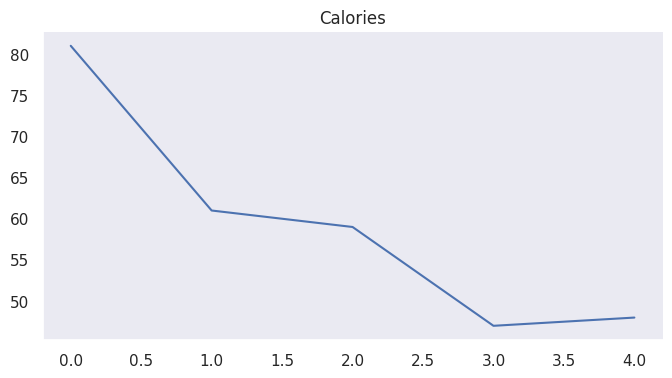

In [ ]:
from matplotlib import pyplot as plt
_df_13['Calories'].plot(kind='line', figsize=(8, 4), title='Calories')
plt.gca().spines[['top', 'right']].set_visible(False)

Key Findings:


*   From above graph we can understand that how high calories can be burned with increasing intensity level




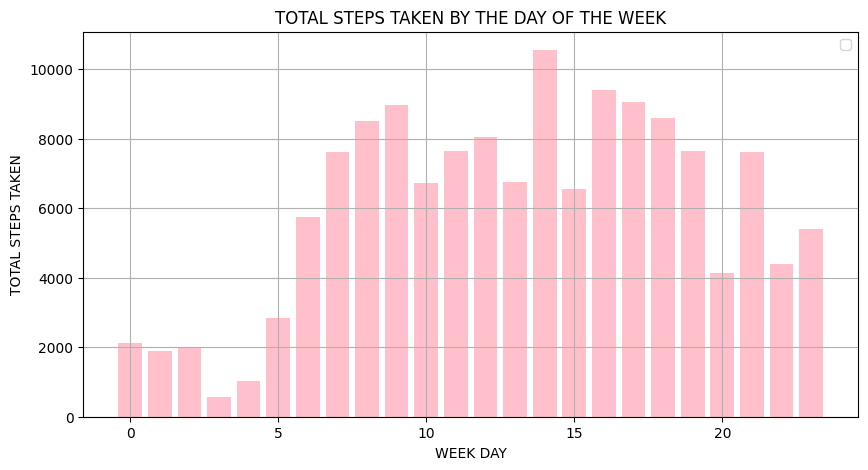

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(merge_df1.WeekDay, merge_df1.StepTotal,
        color="pink")
plt.xlabel("WEEK DAY")
plt.ylabel("TOTAL STEPS TAKEN")
plt.title("TOTAL STEPS TAKEN BY THE DAY OF THE WEEK")
plt.grid()
plt.show()

Key Findings:

*   We find that the week days between 10 to 15 have a spike increse in total steps taken.
*   Week days between 0 to have low level of total steps taken.



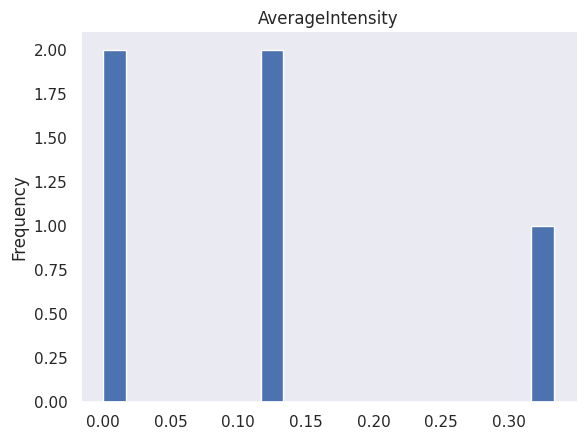

In [ ]:
from matplotlib import pyplot as plt
_df_3['AverageIntensity'].plot(kind='hist', bins=20, title='AverageIntensity')
plt.gca().spines[['top', 'right',]].set_visible(False)

Key Finding:
 *   The graph illustrates the distribution of different intensity levels across various frequency intervals.

*   There is positive correletion between frequency and AverageIntensity

